In [1]:
import pickle
import tensorflow as tf
import numpy as np
import pandas as pd

import gym
import load_policy
import tf_util
from utils import describe_env
from imitation_learning import *

## 0. Examine all the mojoco envs

In [2]:
envnames = ['Hopper-v2', 'Ant-v2', 'HalfCheetah-v2', 'Humanoid-v2', 'Reacher-v2', 'Walker2d-v2']

In [3]:
for envname in envnames:
    env = gym.make(envname)
    print(envname)
    describe_env(env)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Hopper-v2
Observations: float32 (11,)
Actions: float32 (3,)
Action space high: [1. 1. 1.]
Action space low: [-1. -1. -1.]
Time step limit: 1000
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Ant-v2
Observations: float32 (111,)
Actions: float32 (8,)
Action space high: [1. 1. 1. 1. 1. 1. 1. 1.]
Action space low: [-1. -1. -1. -1. -1. -1. -1. -1.]
Time step limit: 1000
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
HalfCheetah-v2
Observations: float32 (17,)
Actions: float32 (6,)
Action space high: [

## 1. Run script for Behavioral Cloning

In [4]:
!bash section_2_BC.sh

loading and building expert policy
obs (1, 11) (1, 11)
loaded and built
Instructions for updating:
Please use tf.global_variables instead.
Instructions for updating:
Use `tf.variables_initializer` instead.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
iter 19/20 1000/1000returns [3771.3943318494175, 3779.424224636985, 3771.2758614010268, 3777.9559462062334, 3783.035608709819, 3776.1950723629643, 3774.13591255358, 3775.70636985045, 3777.5329128165586, 3768.728841549772, 3779.7992486296234, 3776.860667967497, 3773.7949654882336, 3779.753246214996, 3773.0658564838423, 3777.245994854956, 3775.1301194714993, 3782.0694666743175, 3773.34060575087, 3776.378136721862]
mean return 3776.1411695097254
std of return 3.5783853681412277
loading and building expert policy
obs (1, 111) (1, 111)
loaded and built
Instructions for updating:
Please use tf.g

Training BC model
Epoch 0 loss = 0.698901
Epoch 1 loss = 0.175880
Epoch 2 loss = 0.192075
Epoch 3 loss = 0.153539
Epoch 4 loss = 0.071195
Epoch 5 loss = 0.067687
Epoch 6 loss = 0.036648
Epoch 7 loss = 0.035374
Epoch 8 loss = 0.042647
Epoch 9 loss = 0.023180
Epoch 10 loss = 0.070652
Epoch 11 loss = 0.019699
Epoch 12 loss = 0.031394
Epoch 13 loss = 0.038022
Epoch 14 loss = 0.035340
Epoch 15 loss = 0.019784
Epoch 16 loss = 0.018398
Epoch 17 loss = 0.014590
Epoch 18 loss = 0.015810
Epoch 19 loss = 0.019296
Evaluating policy from the trained BC
iter 19/20       expert_returns   bc_returns
count       20.000000    20.000000
mean      3776.141170   825.204240
std          3.671346   122.620684
min       3768.728842   540.768108
25%       3773.681376   789.010441
50%       3776.286605   842.028667
75%       3778.323016   900.355446
max       3783.035609  1078.674960
Loading expert data for Ant-v2
(20000, 111) (20000, 1, 8)
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Ple

## 2. Load rewards from BC and expert for plotting

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
!ls -lh results/BC

total 48
-rw-r--r--  1 zichen  staff   797B Sep 12 22:56 Ant-v2-111-20.csv
-rw-r--r--  1 zichen  staff   811B Sep 12 22:56 HalfCheetah-v2-17-20.csv
-rw-r--r--  1 zichen  staff   800B Sep 12 22:56 Hopper-v2-11-20.csv
-rw-r--r--  1 zichen  staff   818B Sep 12 22:57 Humanoid-v2-376-20.csv
-rw-r--r--  1 zichen  staff   851B Sep 12 22:57 Reacher-v2-11-20.csv
-rw-r--r--  1 zichen  staff   802B Sep 12 22:57 Walker2d-v2-17-20.csv


In [6]:
df_full = []
for fn in os.listdir('results/BC/'):
    envname = fn.split('-')[0]
    df = pd.read_csv(os.path.join('results/BC/', fn))
    df['envname'] = envname
    df_full.append(df)

df_full = pd.concat(df_full)
print(df_full.shape)

(120, 4)


In [7]:
df_full = df_full.melt(id_vars='envname', value_vars=['expert_returns', 'bc_returns'],
                      var_name='policy', value_name='returns')
print(df_full.shape)
df_full.head()

(240, 3)


,envname,policy,returns
0,Ant,expert_returns,4868.024269
1,Ant,expert_returns,4940.576401
2,Ant,expert_returns,4961.572232
3,Ant,expert_returns,4945.449676
4,Ant,expert_returns,4783.008102


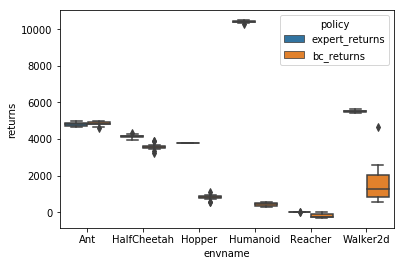

In [8]:
sns.boxplot(x='envname', y='returns', data=df_full, hue='policy');

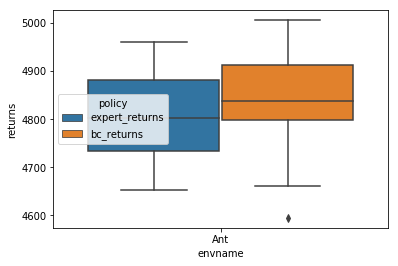

In [9]:
sns.boxplot(x='envname', y='returns', data=df_full.query('envname == "Ant"'), 
            hue='policy')

## 2. Run script for DAgger

In [13]:
!bash section_3_DAgger.sh

loading and building expert policy
obs (1, 11) (1, 11)
loaded and built
Loading expert data for Hopper-v2
(20000, 11) (20000, 1, 3)
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Observations: float32 (11,)
Actions: float32 (3,)
Action space high: [1. 1. 1.]
Action space low: [-1. -1. -1.]
Time step limit: 1000
Training DAgger model using expert data
Epoch 0 loss = 2.517256
Epoch 1 loss = 0.276841
Epoch 2 loss = 0.205529
Epoch 3 loss = 0.107981
Epoch 4 loss = 0.088922
Epoch 5 loss = 0.086729
Epoch 6 loss = 0.056060
Epoch 7 loss = 0.059440
Epoch 8 loss = 0.040903
Epoch 9 loss = 0.044462
Evaluating DAgger policy...
iter 19/20average returns: 680.3550
DAgger iter 0
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 5.715177
Epoch 1 loss = 0.035602
Epoch

Epoch 6 loss = 0.041653
Epoch 7 loss = 0.069960
Epoch 8 loss = 0.056052
Epoch 9 loss = 0.025550
Evaluating DAgger policy...
iter 19/20average returns: 1657.6560
DAgger iter 17
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.607699
Epoch 1 loss = 0.049594
Epoch 2 loss = 0.034392
Epoch 3 loss = 0.020956
Epoch 4 loss = 0.055623
Epoch 5 loss = 0.015447
Epoch 6 loss = 0.027127
Epoch 7 loss = 0.049955
Epoch 8 loss = 0.059846
Epoch 9 loss = 0.028379
Evaluating DAgger policy...
iter 19/20average returns: 1917.3421
DAgger iter 18
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.537941
Epoch 1 loss = 0.030127
Epoch 2 loss = 0.055724
Epoch 3 loss = 0.031812
Epoch 4 loss = 0.045851
Epoch 5 loss = 0.061864
Epoch 6 loss = 0.024524
Epoch 7 loss = 0.031723
Epoch 8 loss = 0.044222
Epoch 9 loss = 0.036617
Evaluating DAg

iter 19/20average returns: 4783.6307
DAgger iter 12
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.000552
Epoch 1 loss = 0.000843
Epoch 2 loss = 0.000754
Epoch 3 loss = 0.000630
Epoch 4 loss = 0.000537
Epoch 5 loss = 0.000722
Epoch 6 loss = 0.000505
Epoch 7 loss = 0.000620
Epoch 8 loss = 0.000829
Epoch 9 loss = 0.000527
Evaluating DAgger policy...
iter 19/20average returns: 4747.8293
DAgger iter 13
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.000555
Epoch 1 loss = 0.000708
Epoch 2 loss = 0.000313
Epoch 3 loss = 0.000521
Epoch 4 loss = 0.000653
Epoch 5 loss = 0.000881
Epoch 6 loss = 0.000668
Epoch 7 loss = 0.000645
Epoch 8 loss = 0.000591
Epoch 9 loss = 0.000883
Evaluating DAgger policy...
iter 19/20average returns: 4752.4042
DAgger iter 14
Running learned policy and get annotated actions from the 

Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.006702
Epoch 1 loss = 0.009511
Epoch 2 loss = 0.014724
Epoch 3 loss = 0.012259
Epoch 4 loss = 0.008943
Epoch 5 loss = 0.008506
Epoch 6 loss = 0.014379
Epoch 7 loss = 0.010676
Epoch 8 loss = 0.008276
Epoch 9 loss = 0.012193
Evaluating DAgger policy...
iter 19/20average returns: 3753.4384
DAgger iter 8
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.016318
Epoch 1 loss = 0.009531
Epoch 2 loss = 0.010037
Epoch 3 loss = 0.010195
Epoch 4 loss = 0.012622
Epoch 5 loss = 0.010520
Epoch 6 loss = 0.010511
Epoch 7 loss = 0.013660
Epoch 8 loss = 0.014224
Epoch 9 loss = 0.012392
Evaluating DAgger policy...
iter 19/20average returns: 3844.5220
DAgger iter 9
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.005327
Epoch 1 loss = 0.012371
Epoc

Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 1.122224
Epoch 1 loss = 0.073443
Epoch 2 loss = 0.055649
Epoch 3 loss = 0.072246
Epoch 4 loss = 0.040086
Epoch 5 loss = 0.062792
Epoch 6 loss = 0.051926
Epoch 7 loss = 0.052555
Epoch 8 loss = 0.082833
Epoch 9 loss = 0.069280
Evaluating DAgger policy...
iter 19/20average returns: 790.8196
DAgger iter 3
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.783208
Epoch 1 loss = 0.053976
Epoch 2 loss = 0.086859
Epoch 3 loss = 0.069605
Epoch 4 loss = 0.062120
Epoch 5 loss = 0.078482
Epoch 6 loss = 0.049222
Epoch 7 loss = 0.093622
Epoch 8 loss = 0.080534
Epoch 9 loss = 0.066880
Evaluating DAgger policy...
iter 19/20average returns: 909.5005
DAgger iter 4
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.601428
Epoch 1 loss = 0.035855
Epoch 

loading and building expert policy
obs (1, 11) (1, 11)
loaded and built
Loading expert data for Reacher-v2
(1000, 11) (1000, 1, 2)
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Observations: float32 (11,)
Actions: float32 (2,)
Action space high: [1. 1.]
Action space low: [-1. -1.]
Time step limit: 50
Training DAgger model using expert data
Epoch 0 loss = 2.939369
Epoch 1 loss = 0.782596
Epoch 2 loss = 0.564038
Epoch 3 loss = 1.224918
Epoch 4 loss = 0.619352
Epoch 5 loss = 0.130503
Epoch 6 loss = 0.133121
Epoch 7 loss = 0.124753
Epoch 8 loss = 0.119602
Epoch 9 loss = 0.071355
Evaluating DAgger policy...
iter 19/20average returns: -4265.1761
DAgger iter 0
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 15.011839
Epoch 1 loss = 0.156296
Epoch 2 loss

Epoch 7 loss = 0.005063
Epoch 8 loss = 0.009429
Epoch 9 loss = 0.006203
Evaluating DAgger policy...
iter 19/20average returns: -6.2593
DAgger iter 17
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.004816
Epoch 1 loss = 0.005971
Epoch 2 loss = 0.008994
Epoch 3 loss = 0.007712
Epoch 4 loss = 0.006119
Epoch 5 loss = 0.008940
Epoch 6 loss = 0.006313
Epoch 7 loss = 0.005231
Epoch 8 loss = 0.006321
Epoch 9 loss = 0.004890
Evaluating DAgger policy...
iter 19/20average returns: -7.3922
DAgger iter 18
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.019760
Epoch 1 loss = 0.007141
Epoch 2 loss = 0.012466
Epoch 3 loss = 0.005276
Epoch 4 loss = 0.008545
Epoch 5 loss = 0.008003
Epoch 6 loss = 0.007176
Epoch 7 loss = 0.006775
Epoch 8 loss = 0.010136
Epoch 9 loss = 0.009547
Evaluating DAgger policy...
iter 19/20aver

Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.038935
Epoch 1 loss = 0.031654
Epoch 2 loss = 0.038553
Epoch 3 loss = 0.041049
Epoch 4 loss = 0.036442
Epoch 5 loss = 0.051548
Epoch 6 loss = 0.032919
Epoch 7 loss = 0.033170
Epoch 8 loss = 0.039082
Epoch 9 loss = 0.039893
Evaluating DAgger policy...
iter 19/20average returns: 5093.9944
DAgger iter 13
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.034464
Epoch 1 loss = 0.033760
Epoch 2 loss = 0.043715
Epoch 3 loss = 0.036077
Epoch 4 loss = 0.031561
Epoch 5 loss = 0.053008
Epoch 6 loss = 0.031160
Epoch 7 loss = 0.041950
Epoch 8 loss = 0.033694
Epoch 9 loss = 0.037354
Evaluating DAgger policy...
iter 19/20average returns: 5384.3196
DAgger iter 14
Running learned policy and get annotated actions from the expert
Aggregating data...
Updating DAgger with aggregated data...
Epoch 0 loss = 0.105796
Epoch 1 loss = 0.036140
Ep

## 3. Load rewards from DAgger and expert for plotting

In [10]:
!ls -lh results/DAgger/

total 144
-rw-r--r--  1 zichen  staff   8.1K Sep 12 23:08 Ant-v2-111-10-20.csv
-rw-r--r--  1 zichen  staff   8.4K Sep 12 23:12 HalfCheetah-v2-17-10-20.csv
-rw-r--r--  1 zichen  staff   8.4K Sep 12 23:01 Hopper-v2-11-10-20.csv
-rw-r--r--  1 zichen  staff   8.3K Sep 12 23:16 Humanoid-v2-376-10-20.csv
-rw-r--r--  1 zichen  staff   8.7K Sep 12 23:17 Reacher-v2-11-10-20.csv
-rw-r--r--  1 zichen  staff   8.2K Sep 12 23:21 Walker2d-v2-17-10-20.csv


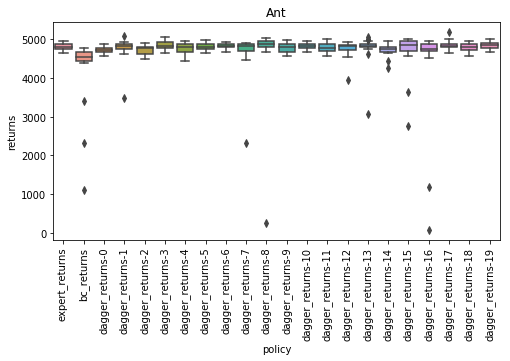

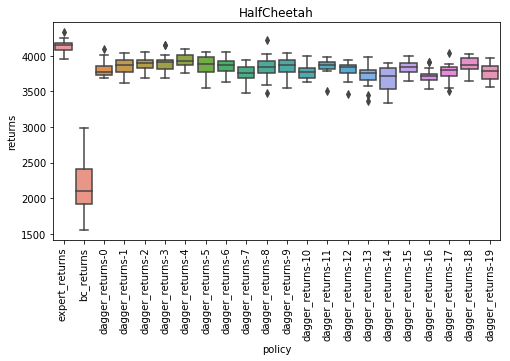

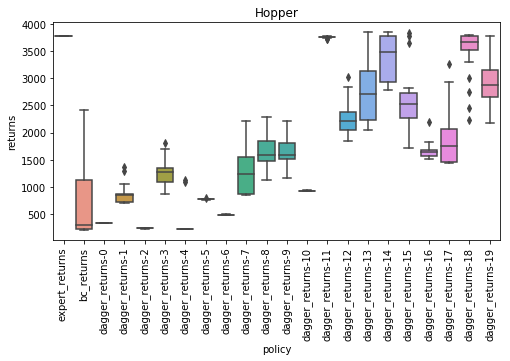

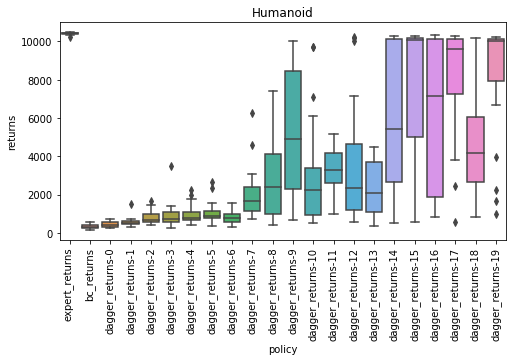

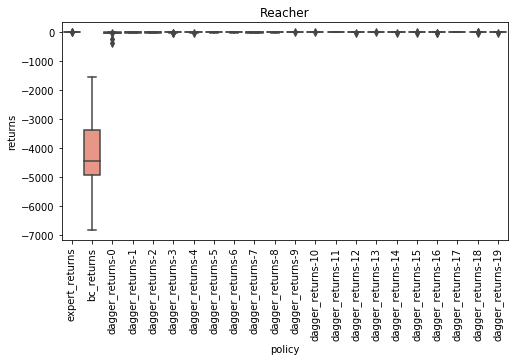

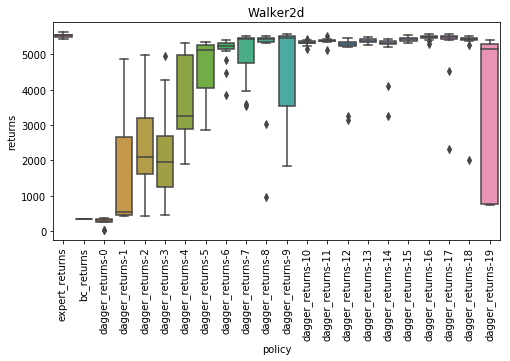

In [11]:
for fn in os.listdir('results/DAgger'):
    envname = fn.split('-')[0]
    df = pd.read_csv(os.path.join('results/DAgger', fn))
    df_melt = df.melt(value_vars=df.columns[1:],
                      var_name='policy', value_name='returns')
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax = sns.boxplot(x='policy', y='returns', data=df_melt, ax=ax)
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
    ax.set_title(envname)